In [3]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas_profiling as ppf

In [5]:
data = pd.read_csv("financial_ratio_transpose.csv")
cols_drop = ["day -1", "day 0", "day 1", "day 2", "day 3", "Feature"]

data.drop(cols_drop, axis=1, inplace = True)

display(data.head())

data.shape

,current-ratio,gross-margin,operating-margin,ebit-margin,pre-tax-profit-margin,net-profit-margin,asset-turnover,receiveable-turnover,days-sales-in-receivables,roe,return-on-tangible-equity,roa,roi,book-value-per-share,sigma
0,1.1417,42.5065,30.7008,30.7008,31.2679,26.3775,0.2657,2.7117,33.1894,34.1583,34.1583,7.0086,13.2887,4.1458,0.017064
1,1.1630,39.7778,30.0918,30.0918,30.1322,25.8034,0.3148,1.9010,47.3425,43.4208,43.4208,8.1216,17.3741,3.9365,0.016324
2,1.3636,38.1604,22.8369,22.8369,23.0316,19.5879,0.1998,1.7278,52.0889,19.3958,19.3958,3.9128,7.7272,3.8487,0.023187
3,1.4695,37.9995,21.9335,21.9335,22.0106,18.8540,0.1881,1.8608,48.3664,15.5682,15.5682,3.5460,6.7655,4.2182,0.033035
4,1.4960,38.3619,22.0414,22.0414,22.5250,19.2907,0.1820,1.9009,47.3467,14.3436,14.3436,3.5109,6.7154,4.5343,0.011731


(400, 15)

In [3]:
pr = ppf.ProfileReport(data)
pr.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.27it/s]


In [7]:
# remove the ratios with high correlations with others

remove = ["net-profit-margin","net-profit-margin","ebit-margin","roa"]
data.drop(remove,axis=1,inplace = True)

In [8]:
data.head()

,current-ratio,gross-margin,operating-margin,pre-tax-profit-margin,asset-turnover,receiveable-turnover,days-sales-in-receivables,roe,return-on-tangible-equity,roi,book-value-per-share,sigma
0,1.1417,42.5065,30.7008,31.2679,0.2657,2.7117,33.1894,34.1583,34.1583,13.2887,4.1458,0.017064
1,1.1630,39.7778,30.0918,30.1322,0.3148,1.9010,47.3425,43.4208,43.4208,17.3741,3.9365,0.016324
2,1.3636,38.1604,22.8369,23.0316,0.1998,1.7278,52.0889,19.3958,19.3958,7.7272,3.8487,0.023187
3,1.4695,37.9995,21.9335,22.0106,0.1881,1.8608,48.3664,15.5682,15.5682,6.7655,4.2182,0.033035
4,1.4960,38.3619,22.0414,22.5250,0.1820,1.9009,47.3467,14.3436,14.3436,6.7154,4.5343,0.011731


In [11]:
data.describe()

,current-ratio,gross-margin,operating-margin,pre-tax-profit-margin,asset-turnover,receiveable-turnover,days-sales-in-receivables,roe,return-on-tangible-equity,roi,book-value-per-share,sigma
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.982951,55.418802,20.564887,20.387927,0.227240,4.956246,33.667105,6.301302,-4.536191,4.040595,17.090565,0.018706
std,1.575446,26.955592,39.287562,39.586964,0.165278,5.953220,18.359036,23.679656,214.699719,5.083152,22.448774,0.014623
min,0.627100,-17.485600,-398.360400,-395.805400,0.034300,0.948400,3.339500,-169.738700,-3572.881000,-28.222400,-0.052700,0.001572
25%,1.054725,34.912600,5.353525,4.867550,0.130775,1.900975,20.592425,3.650250,-1.066550,2.643900,6.352025,0.009406
50%,1.558350,51.391800,23.266800,23.774350,0.158800,2.762850,32.575700,5.573050,7.001100,4.180600,11.642650,0.014946
75%,2.231600,67.125475,34.182050,35.315225,0.236750,4.371200,47.343125,8.919500,13.439100,6.057450,21.305525,0.023407
max,10.291100,100.000000,69.491200,74.025300,0.689600,26.950100,94.901600,397.503100,796.315800,17.374100,205.000000,0.123592


In [9]:
X = data.drop("sigma",axis=1)
y = data["sigma"].values

In [15]:
# perform power transform to all the predictors and the response

from sklearn.preprocessing import power_transform,OneHotEncoder

power = power_transform(data)
powered_data = data.copy()

pos = 0
for col in powered_data.columns:
    powered_data[col] = power[:,pos]
    pos = pos+1


In [16]:
train_X,test_x,train_y,test_y = train_test_split(powered_data.drop("sigma",axis=1),powered_data["sigma"],test_size=0.1)

In [17]:
# Run Random Forest model

model = RandomForestRegressor()
model.fit(train_X,train_y)
model.score(test_x,test_y)

0.3811072696498171

In [18]:
pred = model.predict(test_x)

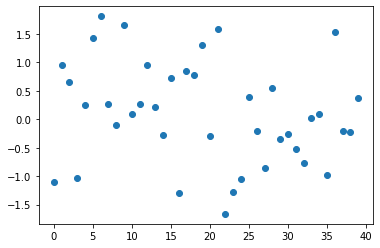

In [19]:
plt.scatter(range(len(pred)),test_y-pred)